
# Project: TMBd movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about  10,000 movies collected from The Movie Database (TMDb), including user ratings and revenues. Using this data, I will be analyzing the properties associated with the movies listed in the data set and analyzing questions that provide answers to; the correlation between the movies' revenue and budget, some kinds of properties associated with movies that have high revenue, directors that made the highest revenue over time, the most expensive movie that was produced, highest revenue generated from the movies and in what year, also, top movies that gave people high satisfaction.

In [1]:
#import neccessary packages that will be useful for his analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline
 


<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, I load the tmdb-movies dataset and view general properties of the data to have a foresight of  what it looks like, and check for cleanliness. Here, the data set is cleaned, structured and trimmed for analysis into a desired useable format for better decision making. The techniques used in this section to clean the data includes, check for null values, missing values, duplicate rows and handling them, this is to reduce statistical bias.
### General Properties

#### Load the dataset to check a few samples of the dataset and get an overview of what it looks like

In [2]:
#load data
tmbd_movies_df = pd.read_csv('tmdb-movies.csv')
tmbd_movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#check for unique values in data set
tmbd_movies_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

#### To check out the number of rows and columns in this data set

In [4]:
tmbd_movies_df.shape

(10866, 21)

#### To get a statistical summary of the data set

In [5]:
#check for statistical summary
tmbd_movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### To get a brief information about the dataset, gives an idea on values that are missing in the column amongst other information.



In [6]:
#check for general information about the data
tmbd_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       



### Data Cleaning (drop columns, check and fill missing values, check and fix duplicate rows)

#### Drop some columns that will not be used in this analysis 

In [7]:
#drop columns that will not be needed in this analysis
tmbd_movies_df.drop(['imdb_id', 'homepage', 'keywords', 'cast', 'tagline', 'overview', 'release_date', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)
tmbd_movies_df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


#### To ensure there are no mistakes in the year value, we check for all its unique values.

In [8]:
#check for unique values in the year column
tmbd_movies_df['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

#### To check for new missing values in the dataset 

In [9]:
#check for missing values
tmbd_movies_df.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

#### There are missing values in some categorical value column and they need to be fixed, hence, I replace. it with a fixed value 'unknown'. Although, there are other ways to replace categorical missing values, like using the mode, but using the mode in this analysis will make the data bias. Also, in the budget and revenue columns, there seems to be some missing values represented as '0', this cannot be replaced with any statistical function because it might lead to bias and each row in this data set is independent of the other.

In [10]:
#fill missing values
tmbd_movies_df.fillna('unknown', inplace= True)
tmbd_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   director              10866 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10866 non-null  object 
 8   production_companies  10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1018.8+ KB


In [11]:
#check for duplicates
tmbd_movies_df[tmbd_movies_df.duplicated()]

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year
2090,42194,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010


In [12]:
#to view duplicates
tmbd_movies_df[tmbd_movies_df["original_title"]=="TEKKEN"]

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year
2089,42194,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010
2090,42194,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010


In [13]:
#drop druplicates
tmbd_movies_df.drop_duplicates(inplace=True)

In [14]:
#check again to confirm if duplicate data are dropped
print(tmbd_movies_df.duplicated().sum())

0


<a id='eda'></a>
## Exploratory Data Analysis

> Now that the dataset has been trimmed and cleaned, it is ready for exploration. Here, I compute statistics and create visualizations with the goal of addressing the research questions that have been earlier stated in the Introduction section. This section helps to understand the data set better and discover hidden trends and insights from the data.


#### A single variable analysis is performed for each feature that is included in this analysis, to see the distribution and perharps outliers for these variables. For this, I use visualizations to examine each feature which is more informative and will help understand the data much better. I use histogram for these features.

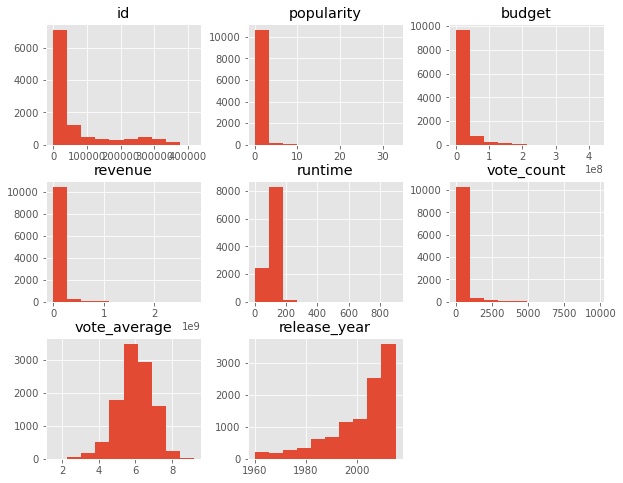

In [15]:
#see the distribution of attributes using a histogram
tmbd_movies_df.hist(figsize=(10,8));

### Research Question 1: What is the correlation between budget and revenue?
#### In this analysis, finding the correlation between the budget and revenue is important, It allows for future financial forecast.

<a id='Scatter'></a>
## Scatter Plot

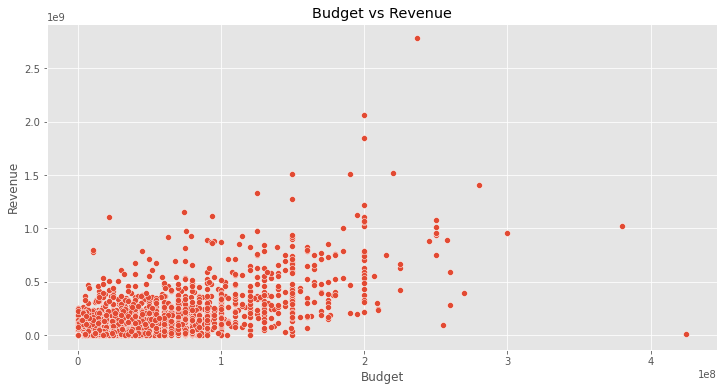

In [16]:
#use a scatter plot to check for correlation between budget and revenue
#define a function for scatter plot to avoid writing repeatitive codes in constructing other scatter plots
def plot_scatter(a,b,c):
    fig = plt.figure(figsize=(12,6))
    sns.scatterplot(x=a, y=b, data=c)
    plt.title('Budget vs Revenue')
    plt.xlabel('Budget')
    plt.ylabel('Revenue')
plot_scatter('budget', 'revenue', tmbd_movies_df)

**NOTE AND OBSERVATION:**


This analysis is performed in order to find the correlation between the revenue and budget by using a scatter plot. A scatter plot is used to depict the relations between two continuous features. The chart above, at a glance shows a positive correlation between the movie budget and revenue, which means as the budget increases, the revenue also tends to increase. However, it is not a perfect relationship but the general budget and revenue increase together is unquestionablly present. Summarily, Movies with high budget likely generates high revenue. The result of this analysis outlines that for future purposes, movie directors or investors could pump more money into film production as it is likely to generate more revenue. Understanding this relationship is useful because the value of the budget can be used to predict the value of the revenue.

### Research Question 2:  Which directors made the highest revenue over time?

#### This question examines top movie directors by their revenue, the result in this analysis will help to make future decisions for investors or stakeholders in the production industry that'd like to make high profit in their investments.

In [17]:
#create a new dataframe to answer this question
df_director = tmbd_movies_df.groupby('director').sum().sort_values('revenue').tail(10)

,revenue
count,1.000000e+01
mean,4.965935e+09
std,1.725033e+09
min,3.649996e+09
25%,3.856041e+09
50%,4.160922e+09
75%,5.610723e+09
max,9.018564e+09


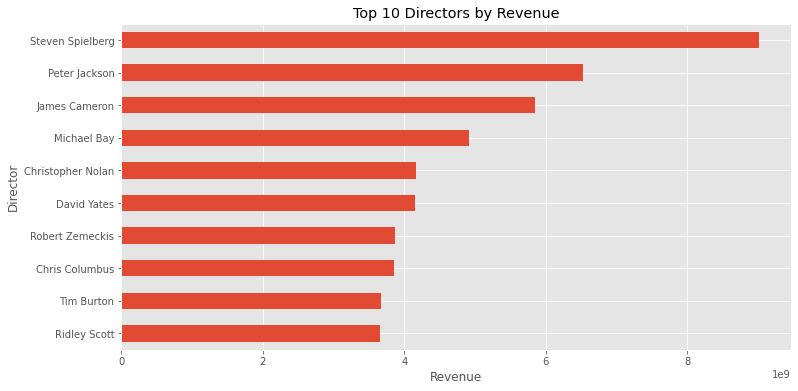

In [18]:
#plot a bar chart to show directors by revenue and a table that shows statistical summary of revenue
df_director['revenue'].plot(kind= 'barh', figsize=(12, 6))
plt.xlabel('Revenue')
plt.ylabel('Director')
plt.title('Top 10 Directors by Revenue')
pd.DataFrame(df_director['revenue'].describe())

**NOTE AND OBSERVATION:**


The barchart above which is a pictorial representation of data in a horizonal bar, where the length of bars are proportional to the measure of data, it illustrates the top 10 directors by revenue, this means from top to bottom on the chart, movies directed by these directors generate more revenue.

### Research Question 3:  What movies were more expensive to produce?
#### This question examines the budget on movies produced, the essence is to check if movies that were expensive to produce generates more revenue to help in future budgeting.

In [19]:
#create a new dataframe to answer this question
df_original_title = tmbd_movies_df.groupby('original_title').sum().sort_values('budget', ascending = False).head(10)

,budget
count,1.000000e+01
mean,1.106543e+09
std,3.274313e+08
min,6.270000e+08
25%,8.325000e+08
50%,1.069380e+09
75%,1.351694e+09
max,1.589950e+09


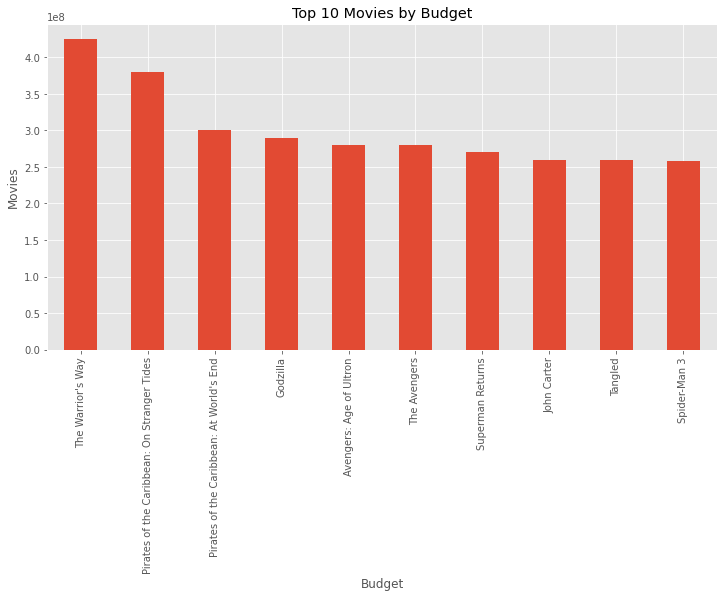

In [20]:
#plot a bar chart to show top 10 movies by budget and a table that shows statistical summary of budget
df_original_title['budget'].plot(kind= 'bar', figsize=(12, 6))
plt.xlabel('Budget')
plt.ylabel('Movies')
plt.title('Top 10 Movies by Budget')
pd.DataFrame(df_director['budget'].describe())

**NOTE AND OBSERVATION:**


The barchart above illustrates that the data are vertically represented in bars, to show which movies were more expensive to produce. This chart shows the top 10 movies by budget. This might help in future decision making by checking the attributes of expensive movies and relating them to their revenue generated. Just as seen in the <a href="#Scatter">Scatter Plot</a></li> above, there is a positive relationship between budget and revenue. Hence, Investors will likely prefer to invest in future movies with similar attribiutes since these kind of movies seem to generate more revenue. This analysis is of great importance in real life situations as well, where people might need to make a choice of watching a movie.

### Research Question 4:  What year was the highest revenue generated?
#### In this analysis, it is important to find what period the highest revenue was generated, hence this question. This question helps to find which year the highest revenue was generated and the factor(s) that possible made this happen. The results of this analysis as well helps in making future decision and conditioning factors to be implemented for generation of high revenues.

In [21]:
#create a new data frame to answer this question
df_year = tmbd_movies_df.groupby('release_year').sum().sort_values('release_year')

Text(0.5, 1.0, 'Revenue Trend by Year')

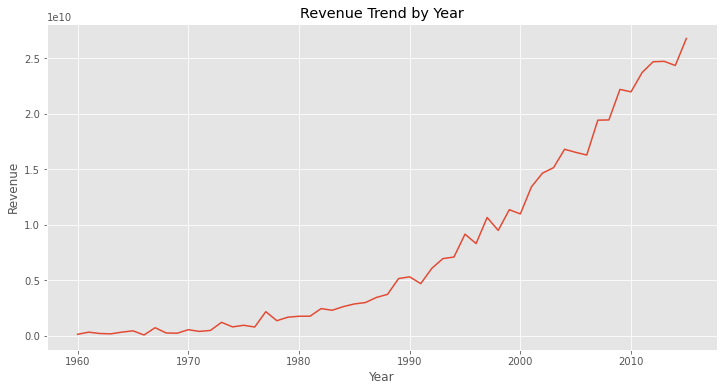

In [22]:
#plot a line chart to show revenue trend by year
df_year['revenue'].plot(kind= 'line', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue Trend by Year')

Text(0.5, 1.0, 'Count of Movies by Year')

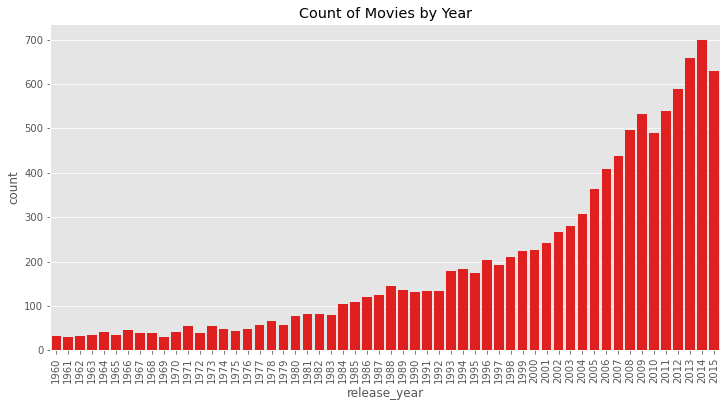

In [23]:
#plot a countplot that shows count of movies per year
fig = plt.figure(figsize=(12,6))
sns.countplot(x= 'release_year', data=tmbd_movies_df, color= 'r')
plt.xticks(rotation=90);
plt.title('Count of Movies by Year')

**NOTE AND OBSERVATION:**

The result for this analysis shown in a line chart describes the illustration of the year on year data for the revenue generated per year. The chart shows an upward trend, which means revenue increased over time, and was prevalent around the year 2013 and 2015.
Furthermore, specifically, the bar graph shows that the highest movie count was produced in the year 2014. 
The revenue increase over these periods may be due to the increase in the number of movies produced during these same periods.
The charts shows, the higher the movie produced, the higher the revenue. An insight for future decisions could be to produce more movies to generate more revenue. 

### Research Question 5:  What movies give people the highest level of satisfaction?
#### Finding the level of consumers satisfaction attributes for these movies is important to be accessed and checked out for making future decisions on movies to be produced, that'd give viewers a good level of satisfaction.

In [24]:
#create a new data frame to answer this question
df_movies = tmbd_movies_df.groupby('original_title').mean().sort_values('vote_average').tail(10)

,vote_average
count,10.000000
mean,101.600000
std,46.827153
min,35.700000
25%,70.875000
50%,90.300000
75%,123.150000
max,197.900000


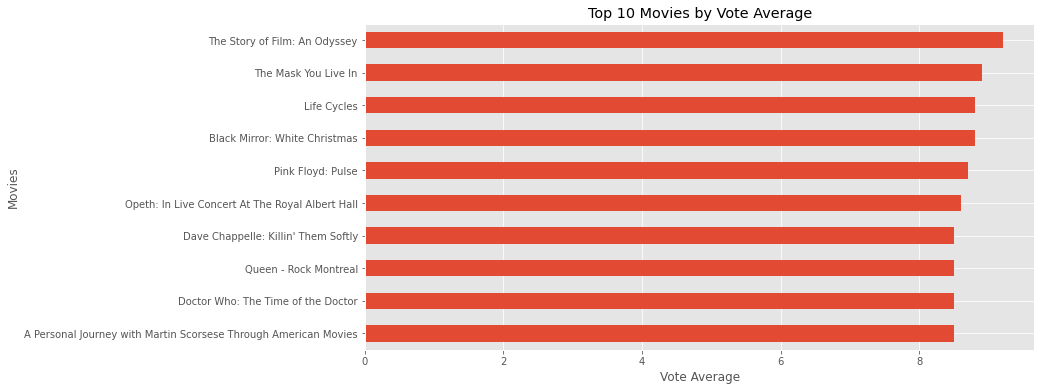

In [25]:
#plot a bar chart to show movies by votecount and a table that shows statistical summary of vote count
df_movies['vote_average'].plot(kind= 'barh', figsize=(12, 6))
plt.xlabel('Vote Average')
plt.ylabel('Movies')
plt.title('Top 10 Movies by Vote Average')
pd.DataFrame(df_director['vote_average'].describe())

**NOTE AND OBSERVATION:**

The bar chart illustrates people's movie preferences by the average of their votes, it shows their level of satisfaction and it is rankeded top 10. The attributes for these movies can be accessed and checked out to make future decisions on movies to be produced. Also, Investors will  prefer to invest in movies with similar attribiutes since these kind of movies seem to receieve higher votes based on the viewers satisfaction. This analysis is of great importance in real life situations as well, as people might need to make a choice of watching a movie by looking at movies with a higher level of satisfaction by their vote average.

### Research Question 6:  Do people's vote for movies influence the amount of revenue generated?
#### In this analysis, checking for the correlation between the vote count and revenue is important, this helps to know if vote counts tends to increase revenue and vice versa.

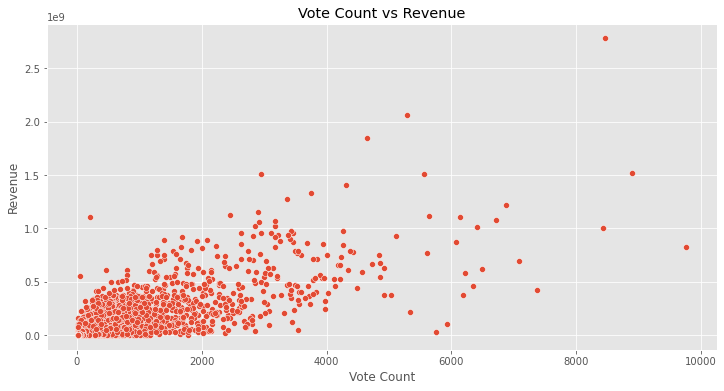

In [26]:
#use a scatter plot to check for correlation between the vote count and revenue
plot_scatter('vote_count', 'revenue', tmbd_movies_df)
plt.title('Vote Count vs Revenue')
plt.xlabel('Vote Count')
plt.ylabel('Revenue');


**NOTE AND OBSERVATION:**

The scatter plot above, at a glance shows a positive correlation between the vote count and revenue, although not a perfect relationship, it illustrates that as the revenue increases, the vote count also tends to increase. This might imply that, since there is a positive correlation between budget and revenue (as the budget increases, the revenue tends to increase), more revenue will be generated and there would be an increase in the vote count if the budget is increased, since movies with high budget likely generates high revenue. For future purposes, movie directors or investors could pump more money into film production as it is likely to generate more revenue and an increase in revenue tends to increase the vote count.

### Research Question 7:  Does the length of movies determine revenue?
#### This question intends to examine and find out what other attribute correlates with revenue generation. Here, I check for the correlation between the runtime and revenue.

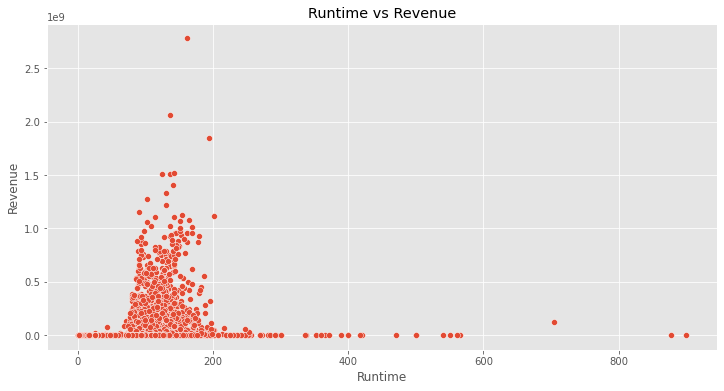

In [27]:
#use a scatter plot to check for correlation between runtime and revenue
plot_scatter('runtime', 'revenue', tmbd_movies_df)
plt.title('Runtime vs Revenue')
plt.xlabel('Runtime')
plt.ylabel('Revenue');

**NOTE AND OBSERVATION:**

The graph trend shows that there is a weak positive relationship between the runtime and the revenue, 
which means, the length of movies do not determine how much revenue will be generated from the movie. 
Check out the <a href="#Correlation">Correlation Matrix</a></li> below for the correlation between revenue and runtime.

<a id='Correlation'></a>
## Correlation Matrix

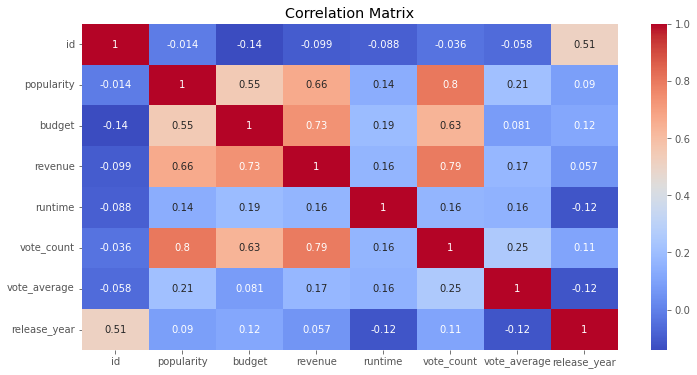

In [29]:
#to find correlation between attributes
fig = plt.figure(figsize = (12, 6))
sns.heatmap(tmbd_movies_df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix');

The correlation matrix above shows relationships between the attributes in the dataset. The further away the correlation coefficient is from zero, the stronger the relationship between the two attributes. This is ranked between 0 and 1. For instance, in this dataset, it is safe to say that the correlation between the revenue and budget is 0.73 which is pretty high and it shows a strong positive correlation. 

<a id='conclusions'></a>
## Conclusions

The data set was cleaned up thoroughly for this analysis to ensure an unbiased result, from checking of the data's general properties to fixing null, missing, and duplicate values. Generally, there seems to be a positive correlation between most attributes used in this analysis with the revenue. Most of the questions answered in the analysis give feedback on the effect of spending more on a movie production, to generate more revenue.
The results show that people prefer movies with a high budget. People rate movies with a high budget. In real-life situations and applications, this analysis can be shown to investors, stakeholders, or directors to make decisions and it shows an increase in revenue when much more money is spent on the movie production (increased budget). Movie popularity, budget, and vote count have a high positive correlation with revenue generated. The length of a movie does no necessarily generate more revenue, as there is a very weak correlation between the runtime of movies and revenue generated. One limitation of exploring this dataset is that rows with missing values had to be dropped because the data types are strings and not integers where one could easily find the mean of the column to fill it up, regardless, it was still useful, as the missing values were dropped.